In [ ]:
!pip install music21 

In [59]:
import numpy as np
import glob
from music21 import converter, instrument, note, chord, stream

def midi_to_piano_roll(files_path):
    piano_rolls = []

    for file in glob.glob(files_path):
        midi = converter.parse(file)
        notes_to_parse = None

        try: 
            s2 = instrument.partitionByInstrument(midi)
            notes_to_parse = s2.parts[0:-1].recurse() 
        except: 
            notes_to_parse = midi.flat.notes
    
        note_range = 128 
        time_steps = midi.duration.quarterLength * 4
        piano_roll = np.zeros((note_range, int(time_steps)))
    
        for element in notes_to_parse:
            element
            if isinstance(element, note.Note):
                piano_roll[element.pitch.midi, int(element.offset*4)] = 1
            elif isinstance(element, chord.Chord):
                for pitch in element.pitches:
                    piano_roll[pitch.midi, int(element.offset*4)] = 1
    
        
        piano_rolls.append(piano_roll)
        
    return piano_rolls


In [60]:
import matplotlib.pyplot as plt

files_path = "input-sounds/genres/test/1 (1).mid"
piano_rolls = midi_to_piano_roll(files_path)

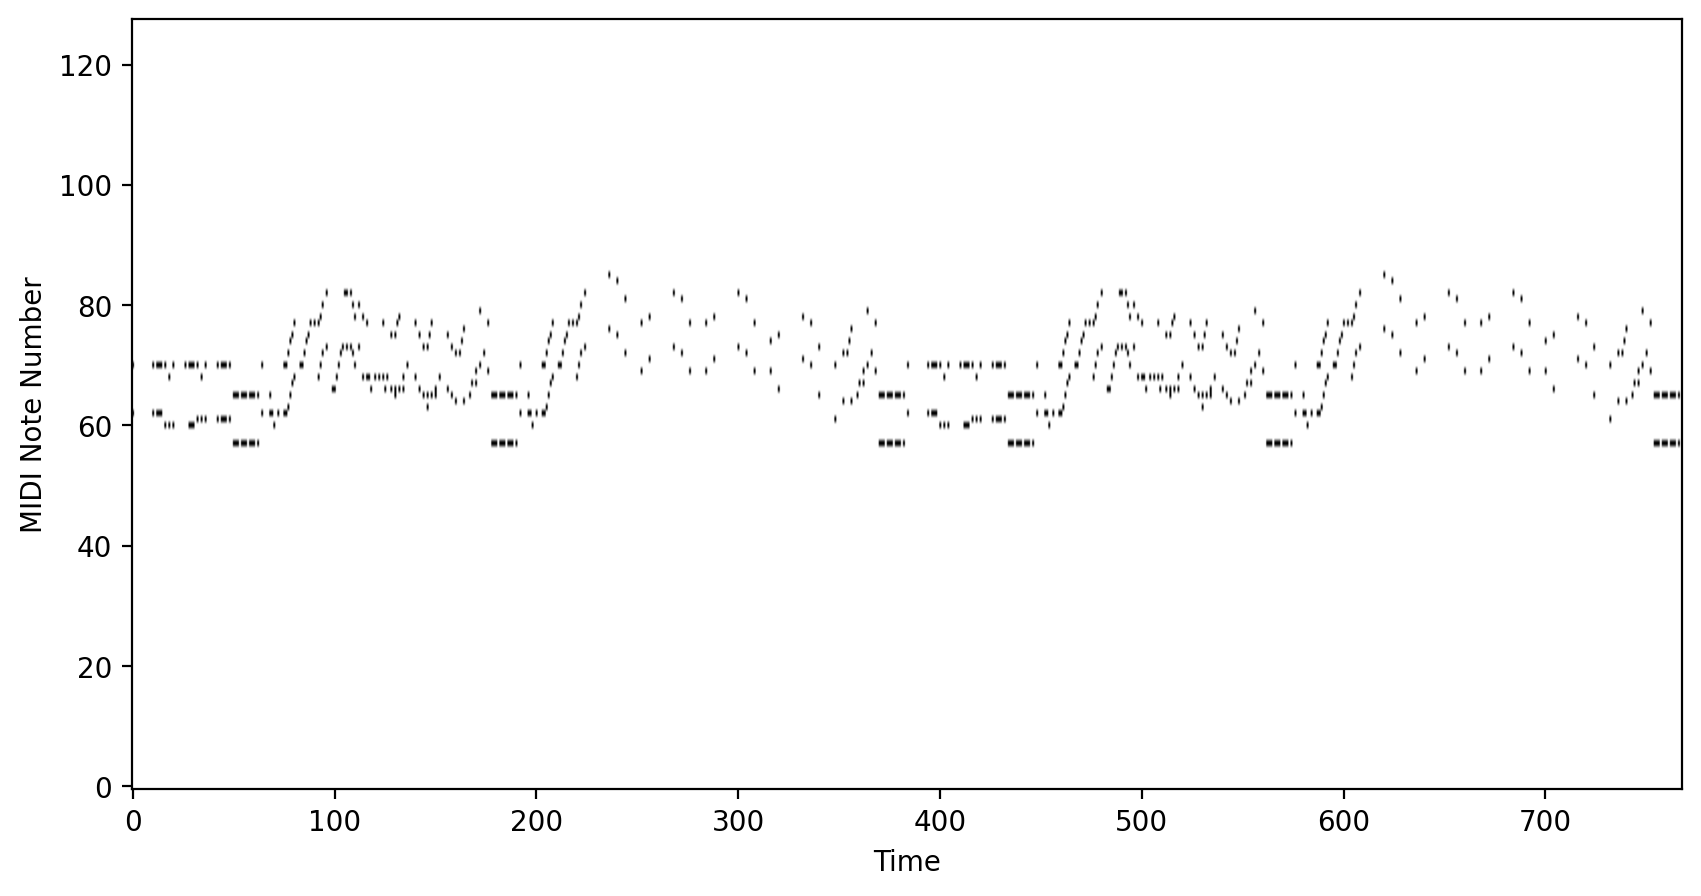

In [61]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Time')
ax.set_ylabel('MIDI Note Number')
ax.imshow(piano_rolls[0], aspect='auto', cmap='gray_r', origin='lower')
plt.show()


In [63]:
def piano_roll_to_midi(piano_roll, file_path):
    # create MIDI file with single instrument
    output_notes = stream.Part()
    instrument_obj = instrument.Piano()
    output_notes.append(instrument_obj)
    
    # iterate over piano roll tensor
    num_time_steps = piano_roll.shape[1]
    for i in range(num_time_steps):
        for j in range(128):
            if piano_roll[j, i] == 1:
                # create note object and add to output stream
                note_obj = note.Note()
                note_obj.pitch.midi = j
                note_obj.offset = i/4.0 # convert from 16th note time step to quarter note time step
                output_notes.append(note_obj)
    
    # write output stream to MIDI file
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp=file_path)


In [36]:
files_path = "generated/tmp/track.mid"
piano_roll_to_midi(piano_rolls[0],files_path)